## Detección de Phishing: Chat en redes sociales

#### 1. Introducción
En este notebook, entrenaremos un modelo para detectar mensajes de phishing en redes sociales. Utilizaremos un conjunto de datos que contiene ejemplos de mensajes tanto de phishing como de no-phishing.

#### 2. Instalamos librerias requeridas

In [57]:
!pip install scikit-learn seaborn numpy

#### 3. Importacion de librerias

In [27]:
import pandas as pd
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

#### 4. Cargamos el conjunto de datos
El archivo CSV que se genero con el notebook `dataset-generation.ipynb`, deberia estar en el mismo directorio que esta notebook actual.

In [28]:
file_path = "dataset_phishing_2023-08-15.csv"
df = pd.read_csv(file_path, sep='\t')

#### 5. Preprocesamiento de datos
Dividiremos el conjunto de datos en conjuntos de entrenamiento y prueba, y luego transformaremos los mensajes en vectores numéricos usando TF-IDF.

In [29]:
x = df['message']
y = df['phishing']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

#### 5. Entrenamos el modelo

In [30]:
clf = MultinomialNB()

# Ajustamos (entrenamos) el modelo con los datos de entrenamiento
clf.fit(X_train_tfidf, y_train)


MultinomialNB()

#### 6. Evaluamos el modelo

In [31]:
y_pred = clf.predict(X_test_tfidf)

print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       152
           1       1.00      0.94      0.97        18

    accuracy                           0.99       170
   macro avg       1.00      0.97      0.98       170
weighted avg       0.99      0.99      0.99       170

Accuracy: 0.9941176470588236


In [32]:
# Supongamos que este es el mensaje nuevo que quieres clasificar
new_message = ["para que"]

# Transformamos el mensaje utilizando el mismo vectorizador TF-IDF que usamos para entrenar el modelo
new_message_tfidf = tfidf_vectorizer.transform(new_message)

# Usamos el modelo entrenado para hacer la predicción
prediction = clf.predict(new_message_tfidf)

# Interpretamos el resultado
if prediction[0] == 0:
    print("El mensaje es legítimo (no phishing)")
else:
    print("El mensaje es phishing")


El mensaje es legítimo (no phishing)


#### Plots

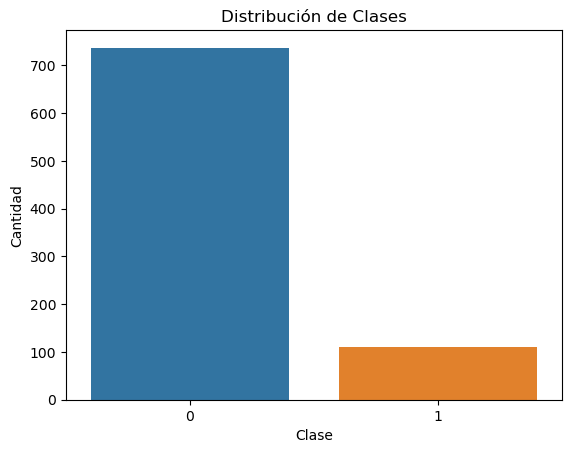

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.countplot(x='phishing', data=df)
plt.title('Distribución de Clases')
plt.xlabel('Clase')
plt.ylabel('Cantidad')
plt.show()


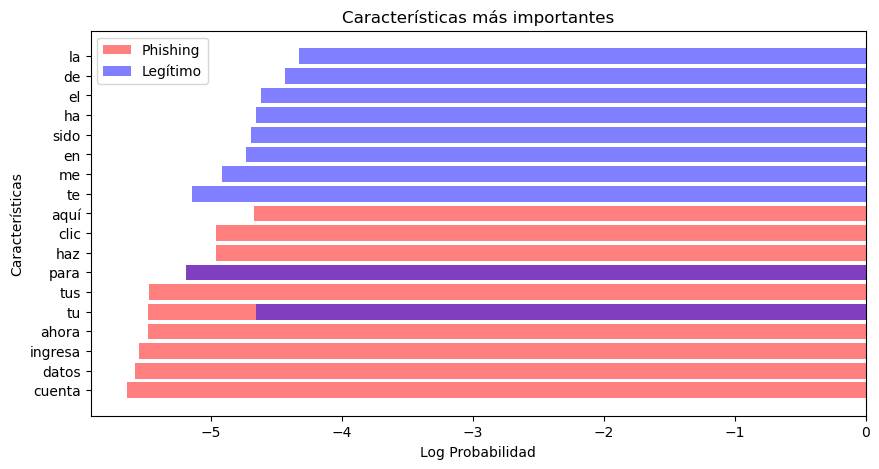

In [34]:
def plot_important_features(vectorizer, clf, n=10):
    feature_names = vectorizer.get_feature_names_out()
    log_prob = clf.feature_log_prob_
    phishing_prob = log_prob[1]
    legitimate_prob = log_prob[0]

    top_phishing_indices = np.argsort(phishing_prob)[-n:]
    top_legitimate_indices = np.argsort(legitimate_prob)[-n:]

    top_phishing_features = [feature_names[i] for i in top_phishing_indices]
    top_legitimate_features = [feature_names[i] for i in top_legitimate_indices]

    plt.figure(figsize=(10, 5))
    plt.barh(top_phishing_features, phishing_prob[top_phishing_indices], color='r', alpha=0.5, label='Phishing')
    plt.barh(top_legitimate_features, legitimate_prob[top_legitimate_indices], color='b', alpha=0.5, label='Legítimo')
    plt.title('Características más importantes')
    plt.xlabel('Log Probabilidad')
    plt.ylabel('Características')
    plt.legend()
    plt.show()

plot_important_features(tfidf_vectorizer, clf)


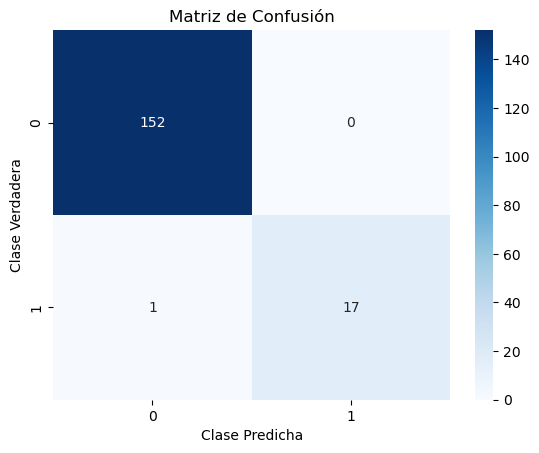

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculamos la matriz de confusión
y_pred = clf.predict(X_test_tfidf)
conf_mat = confusion_matrix(y_test, y_pred)

# La visualizamos como un heatmap
sns.heatmap(conf_mat, annot=True, fmt='d', cmap="Blues")
plt.ylabel('Clase Verdadera')
plt.xlabel('Clase Predicha')
plt.title('Matriz de Confusión')
plt.show()